#Первичная обработка


1. Импортируем библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Подгружаем файл

In [ ]:
df = pd.read_csv("shopping_behavior.csv")

3. Первые 5 строк

In [ ]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Последние 5 строк

In [ ]:
df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


4. Размер таблицы и типы данных

In [ ]:
print("Размер таблицы строки, столбцы:", *df.shape)
df.dtypes

Размер таблицы строки, столбцы: 3900 18


,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


5. Наличие пропусков

In [ ]:
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


Удаление дупликатов

In [ ]:
df = df.drop_duplicates()

Проверим выбросы при помощи ящиков с усами

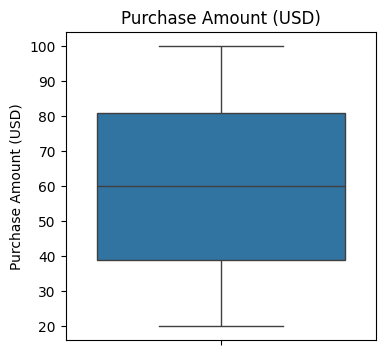

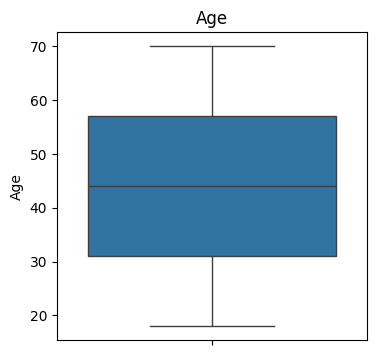

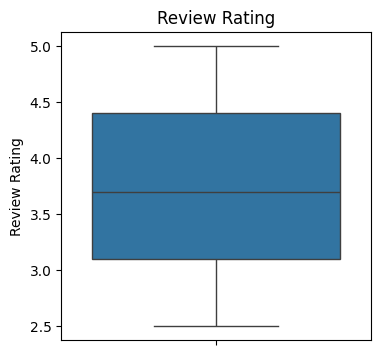

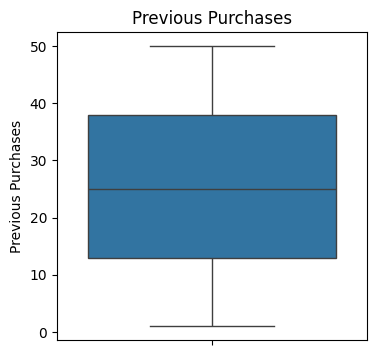

In [ ]:
numeric_cols = ['Purchase Amount (USD)', 'Age', 'Review Rating', 'Previous Purchases']
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df, y=col)
    plt.title(col)
    plt.show()

По графикам видно что выбросов нет, так что можно ничего не делать

#Статистики данных

Общая информация по числовым данным

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Количество уникальных

In [ ]:
df.nunique()

,0
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Size,4
Color,25
Season,4


Частота

In [ ]:
for col in df.columns.to_list()[1:]:
  print(df[col].value_counts(normalize=False))

Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64
Gender
Male      2652
Female    1248
Name: count, dtype: int64
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
G

Корреляционный анализ

In [ ]:
df.corr(numeric_only=True)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


#Графики

1. Тепловая карта корреляций

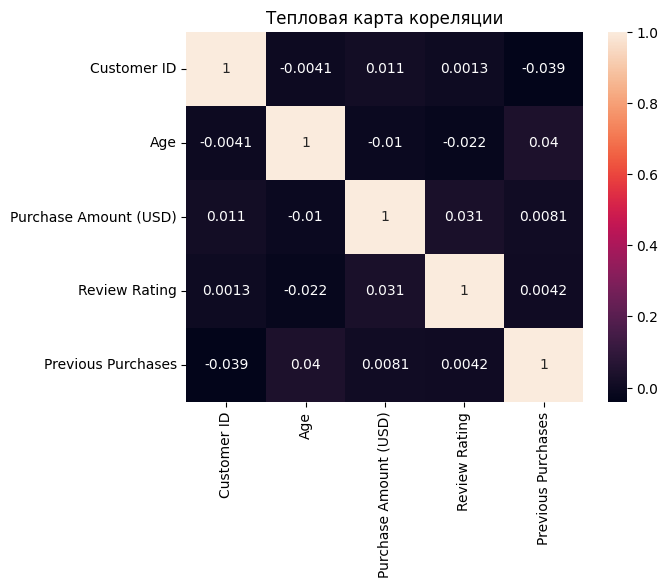

In [ ]:
sns.heatmap( df.corr(numeric_only=True), annot=True)
plt.title("Тепловая карта кореляции")
plt.show()

2. Диаграмма размаха

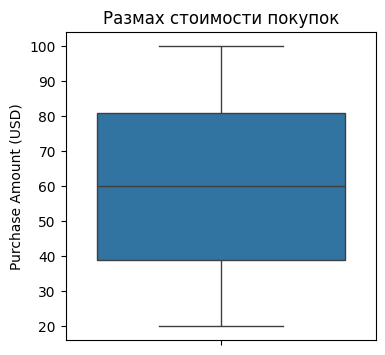

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, y='Purchase Amount (USD)')
plt.title("Размах стоимости покупок")
plt.show()

3. Столбчатая диаграма

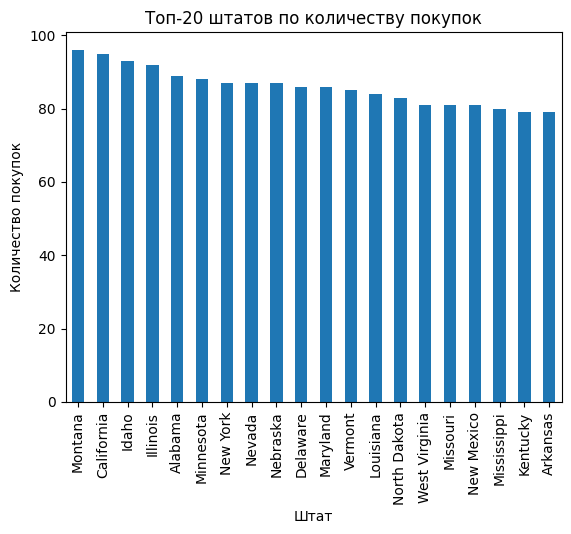

In [ ]:
top20_locs = df['Location'].value_counts().head(20)
top20_locs.plot(kind='bar')
plt.title('Топ-20 штатов по количеству покупок')
plt.xlabel('Штат')
plt.ylabel('Количество покупок')
plt.show()

4. Гистограмма

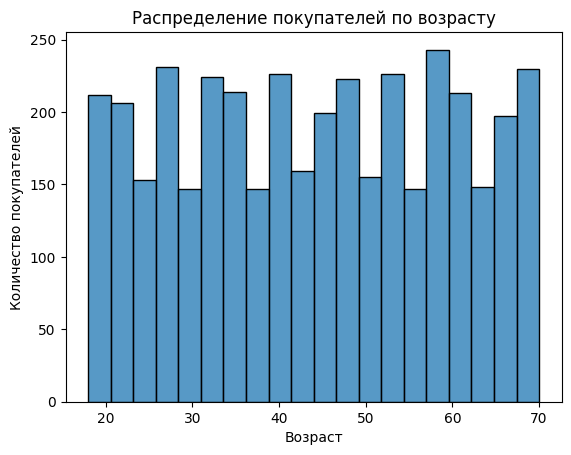

In [ ]:
sns.histplot(df["Age"], bins=20)
plt.title("Распределение покупателей по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Количество покупателей")
plt.show()

5. Круговая диаграмма

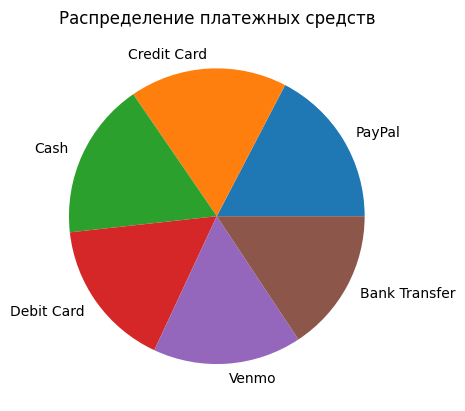

In [ ]:
df['Payment Method'].value_counts().plot(kind="pie")
plt.title('Распределение платежных средств')
plt.ylabel("")
plt.show()

#Агрегации

1. Средний рейтинг за товар

In [ ]:
avg_rating_per_item = df.groupby('Item Purchased')['Review Rating'].mean()
print(avg_rating_per_item)

Item Purchased
Backpack      3.752448
Belt          3.761491
Blouse        3.683626
Boots         3.812500
Coat          3.730435
Dress         3.754819
Gloves        3.864286
Handbag       3.775163
Hat           3.806494
Hoodie        3.719205
Jacket        3.763190
Jeans         3.648387
Jewelry       3.756140
Pants         3.718713
Sandals       3.841250
Scarf         3.700000
Shirt         3.629586
Shoes         3.747333
Shorts        3.711465
Skirt         3.782278
Sneakers      3.757931
Socks         3.750943
Sunglasses    3.744720
Sweater       3.767073
T-shirt       3.782993
Name: Review Rating, dtype: float64


2. Медиана прошлой покупки по частоте покупок

In [ ]:
avg_rating_per_item = df.groupby('Frequency of Purchases')['Previous Purchases'].mean()
print(avg_rating_per_item)

Frequency of Purchases
Annually          24.561189
Bi-Weekly         24.787934
Every 3 Months    24.960616
Fortnightly       25.271218
Monthly           25.278481
Quarterly         26.854352
Weekly            25.771800
Name: Previous Purchases, dtype: float64


3. Размеры относительно пола

In [ ]:
df.groupby("Gender")['Size'].value_counts()

Gender  Size
Female  M        590
        L        337
        S        187
        XL       134
Male    M       1165
        L        716
        S        476
        XL       295
Name: count, dtype: int64

4. Сводная частоты покупок и числовых параметров

In [ ]:
pd.pivot_table(df, index=["Frequency of Purchases"], values=["Purchase Amount (USD)", "Previous Purchases", "Review Rating"])

,Previous Purchases,Purchase Amount (USD),Review Rating
Frequency of Purchases,,,
Annually,24.561189,60.173077,3.755944
Bi-Weekly,24.787934,60.694698,3.706947
Every 3 Months,24.960616,60.082192,3.767295
Fortnightly,25.271218,59.053506,3.755166
Monthly,25.278481,59.330922,3.776311
Quarterly,26.854352,59.984014,3.727531
Weekly,25.771800,58.972171,3.759555


5. Штат и сумма покупок

In [ ]:
df.groupby('Location')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Location,
Alabama,5261
Alaska,4867
Arizona,4326
Arkansas,4828
California,5605
Colorado,4222
Connecticut,4226
Delaware,4758
Florida,3798
